In [1]:
%pylab inline
import px4tools
import pandas
import os
import pickle
import scipy.interpolate

Populating the interactive namespace from numpy and matplotlib


In [2]:
import px4tools.version
px4tools.version.git_revision

'ea072dcdbcaf8c0d0b43e9a6eb16e151f4c06a0e'

In [3]:
print('Loading dataset')
d_accel = px4tools.ulog.PX4MessageDict({'sensor_accel_0': pandas.read_csv('/home/kabir/kalibration/imu/3/log001_sensor_accel_0.csv')})
d_gyro = px4tools.ulog.PX4MessageDict({'sensor_gyro_0': pandas.read_csv('/home/kabir/kalibration/imu/3/log001_sensor_gyro_0.csv')})
print('Loaded dataset')
          
print('Loading sensor series')
gyro = d_gyro.get_topic('sensor_gyro_0')
accel = d_accel.get_topic('sensor_accel_0')
print('Loaded sensor series')

Loading dataset
Loaded dataset
Loading sensor series
Loaded sensor series


Starting polynomial fitting - Gyroscope


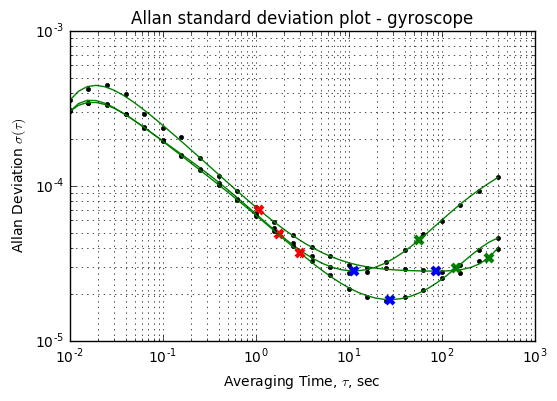

Gyroscope analysis :
{'gyroscope_sig_rrw': [3.3369951232921156e-06, 1.0283262175544912e-05, 4.2921380018863142e-06], 'gyroscope_tau_0': [1.080760102895008, 1.7858112069583763, 2.9939247759182024], 'gyroscope_sig_bi': [4.2474646764580525e-05, 4.2589255090976677e-05, 2.7818158305262931e-05], 'gyroscope_tau_1': [86.157753002239872, 11.322985454739865, 27.693885869647847], 'gyroscope_sig_rw': [7.3093545080224595e-05, 6.5459678570317759e-05, 6.4054314497303478e-05], 'gyroscope_tau_2': [318.72609047725166, 56.607476559873689, 140.93963189710809]}


In [45]:
print('Starting polynomial fitting - Gyroscope')

# Gyroscope
r = {}
plt.figure()
res1 = px4tools.ulog.plot_allan_std_dev(gyro.t_sensor_gyro_0__f_x, min_intervals=50, poly_order=7)
res2 = px4tools.ulog.plot_allan_std_dev(gyro.t_sensor_gyro_0__f_y, min_intervals=50, poly_order=7)
res3 = px4tools.ulog.plot_allan_std_dev(gyro.t_sensor_gyro_0__f_z, min_intervals=50, poly_order=7)

plt.title('Allan standard deviation plot - gyroscope')

for key in res1.keys():
    r['gyroscope_' + key] = [ d[key] for d in [res1, res2, res3] ]
plt.show()
print('Gyroscope analysis :')
print(r)

Starting polynomial fitting - Accelerometer


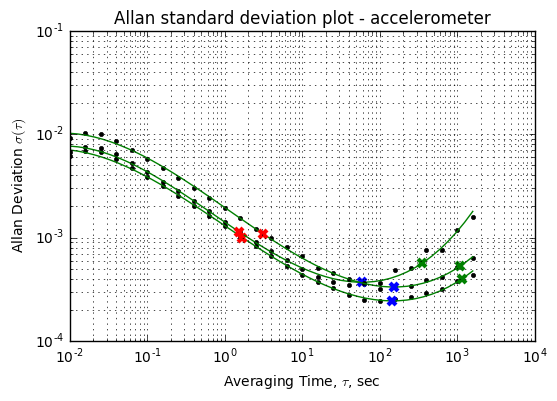

Accelerometer analysis :
{'accelerometer_tau_1': [145.55589375920408, 58.82708804545161, 152.61846358661342], 'accelerometer_tau_0': [1.6880609111939269, 1.52079770473367, 3.1155036879666356], 'accelerometer_sig_rw': [0.0013010989805839245, 0.0014093538212600881, 0.0019194806375088243], 'accelerometer_tau_2': [1134.7914242593201, 350.05280395330624, 1085.3234804426063], 'accelerometer_sig_rrw': [2.0366293962134716e-05, 5.2129455068853424e-05, 2.7781191675139391e-05], 'accelerometer_sig_bi': [0.0003673894849767116, 0.00055646301527508544, 0.00050052839703953198]}


In [44]:
print('Starting polynomial fitting - Accelerometer')
# Accel
r = {}
plt.figure()
res1 = px4tools.ulog.plot_allan_std_dev(accel.t_sensor_accel_0__f_x, min_intervals=15, poly_order=3)
res2 = px4tools.ulog.plot_allan_std_dev(accel.t_sensor_accel_0__f_y, min_intervals=15, poly_order=3)
res3 = px4tools.ulog.plot_allan_std_dev(accel.t_sensor_accel_0__f_z, min_intervals=15, poly_order=3)

plt.title('Allan standard deviation plot - accelerometer')
for key in res1.keys():
    r['accelerometer_' + key] = [ d[key] for d in [res1, res2, res3] ]
plt.show()
print('Accelerometer analysis :')
print(r)